# Apres exploitation , les modèles sont entrainées sur les données jugées utiles.

In [2]:
# pip install scikit-plot

In [3]:
# https://www.kaggle.com/code/tanetboss/how-to-get-high-rating-on-play-store
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scikitplot as skplt # Visualize ML Model Performance Evaluation Metrics


In [4]:
data_init = pd.read_csv('googleplaystore.csv')

In [5]:
data = pd.read_csv('googleplaystore.csv')


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.dropna(inplace=True)

In [8]:
#encoding categorical data
# (with low nbre of unique values )

In [9]:
data.drop(columns=["Genres","Current Ver","Android Ver","Type"],axis=1,inplace=True)

In [10]:
data.drop(columns=["Content Rating"],axis=1,inplace=True)

In [11]:
data["Category"] = data["Category"].astype('category')
data["Category_cat"] = data["Category"].cat.codes
data.drop(columns=["Category"],inplace=True)

In [12]:
#Transformer les Reviews en type int
# Transformer les dates en type date 

In [13]:
# data[data['Reviews'].str.contains('M')]
# data.drop(data.index[10472],inplace=True)
data["Reviews"]=data["Reviews"].astype(int)
data["Last Updated"]=pd.to_datetime(data["Last Updated"])

In [14]:
# transformer "size" en type numerique 1M=10^6 , 1K=10^3

In [15]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 
# data2[data2['Size'].str.contains('M')].replace("M", "",regex=True)
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
data['Size'].fillna(data.Size.mean(),inplace = True)
# fill "Varies with device" with mean of size in each category

In [16]:
# data.head()


In [17]:
data.Price = (data.Price.replace(r'\$', '', regex=True).astype(float))

In [18]:
data.Installs = (data.Installs.replace(r'\+', '', regex=True))
data.Installs = (data.Installs.replace(r'\,', '', regex=True).astype(float))

In [19]:
#removing outliers
#sns.displot(data=data,x="Price",kde=True)
data=data[(data["Reviews"] < 2*1e7)]
data=data[(data["Price"] < 40)]

In [20]:
# Etude du "Rating"

Text(0.5, 1.0, 'Distribution du Rating')

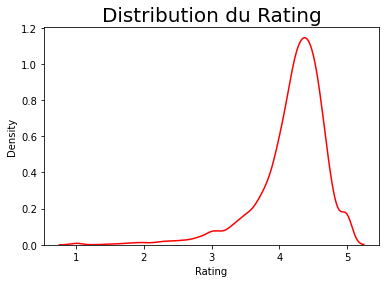

In [21]:
sns.kdeplot(data.Rating, color="Red")
plt.title('Distribution du Rating',size = 20)

<AxesSubplot:>

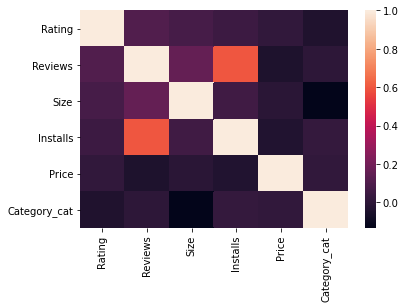

In [22]:
sns.heatmap(data.corr())

In [23]:
# App Rating Prediction:


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms
from sklearn.metrics import mean_absolute_error

In [25]:
# # Split data into training and testing sets
features = ['Reviews','Size', 'Installs', 'Price','Category_cat']
X = data[features]
y = data['Rating']


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [27]:
from sklearn.model_selection import GridSearchCV


# linear regression

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [30]:
 parameters = {'copy_X':[True,False],
               'positive': [True,False],
               'normalize':[True, False],
               'fit_intercept': [True, False],
               'n_jobs': [-1,None]
                 }

In [31]:
grid_GBR = GridSearchCV(estimator=linreg, param_grid = parameters, cv = 2, scoring='neg_mean_squared_error')
grid_GBR.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wis

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please lea

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, None],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [32]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression(n_jobs=-1, normalize=False)

 The best parameters across ALL searched params:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False, 'positive': False}


In [33]:
linear_model=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1, positive=False)

In [34]:
linear_model.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=-1, normalize=True)

In [35]:
Rating_pred =linear_model.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
Rating_pred=np.array(Rating_pred)
compare_df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':Rating_pred.flatten()})
compare_df.head(10)

,Actual,Predicted
0,3.8,4.136950
1,4.5,4.205709
2,4.2,4.162485
3,3.7,4.187847
4,4.3,4.224156
5,4.1,4.170804
6,1.7,4.150545
7,4.4,4.174789
8,4.0,4.174665
9,4.3,4.155015


In [36]:
print('Mean Squared Error=',ms(y_test,Rating_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,Rating_pred))

Mean Squared Error= 0.2741995496370947
mean_absolute_error is 0.3607849764473574


<AxesSubplot:>

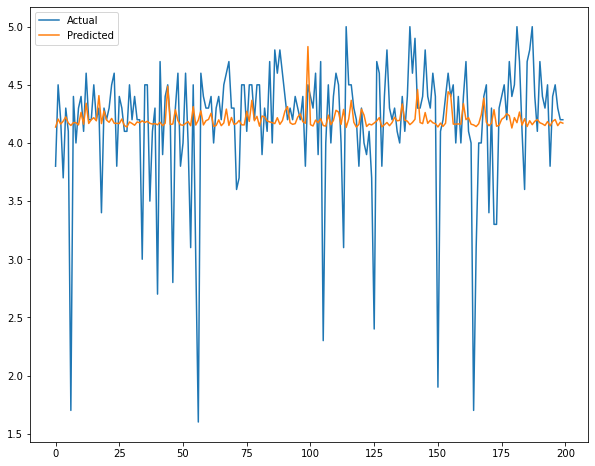

In [37]:
fig=compare_df.head(200)
fig.plot(kind='line',figsize=(10,8))



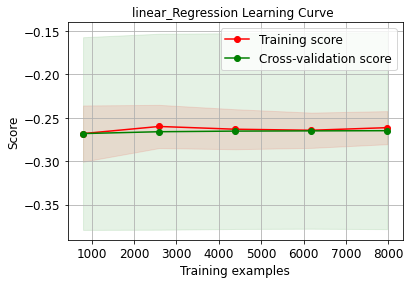

In [38]:

skplt.estimators.plot_learning_curve(linear_model, X, y,
                                     cv=7, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="linear_Regression Learning Curve ");

# KNN 

In [39]:
# KNN model

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_default_model = KNeighborsRegressor()

In [41]:
knn_default_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
parameters = {
 'metric': ['euclidean','minkowski','chebyshev','cityblock'],
 'n_neighbors': [2,3,4,5,6,7,8,9,10]}
grid_GBR = GridSearchCV(estimator=knn_default_model, param_grid = parameters, cv=2,scoring='neg_mean_squared_error')
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'minkowski', 'chebyshev',
                                    'cityblock'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [43]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(metric='cityblock', n_neighbors=10)

 The best parameters across ALL searched params:
 {'metric': 'cityblock', 'n_neighbors': 10}


In [44]:
knn_model2 = KNeighborsRegressor(metric= 'cityblock', n_neighbors= 10, p= 1)
knn_model2.fit(X_train,y_train)

KNeighborsRegressor(metric='cityblock', n_neighbors=10, p=1)

In [45]:
Rating_pred2 =knn_model2.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
Rating_pred2=np.array(Rating_pred2)

compare_df2=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':Rating_pred2.flatten()})


In [46]:
print('Mean Squared Error=',ms(y_test,Rating_pred2))
print('mean_absolute_error is',mean_absolute_error(y_test,Rating_pred2))

Mean Squared Error= 0.28979444842406876
mean_absolute_error is 0.368721346704871


<AxesSubplot:>

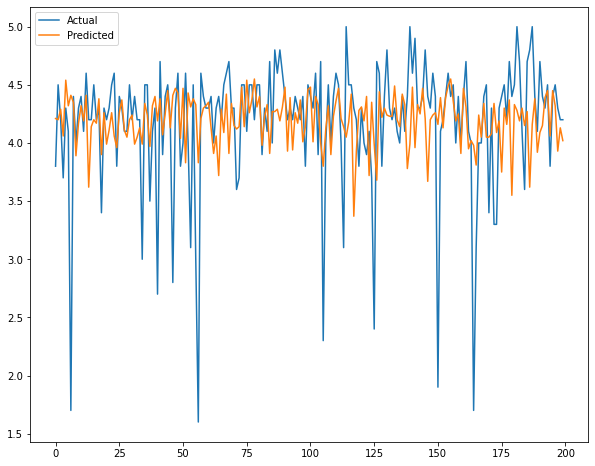

In [47]:
fig=compare_df2.head(200)
fig.plot(kind='line',figsize=(10,8))


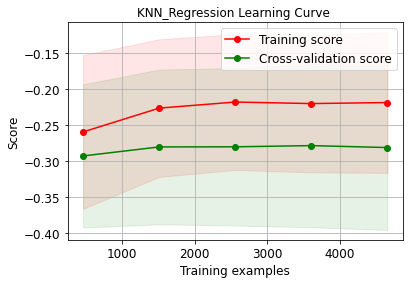

In [48]:

skplt.estimators.plot_learning_curve(knn_model2, X, y,
                                     cv=2, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="KNN_Regression Learning Curve ");

# SVR 

In [49]:
from sklearn.preprocessing import StandardScaler


# normalisation du target

In [50]:
from sklearn.preprocessing import MinMaxScaler
features = ['Reviews','Size', 'Installs', 'Price','Category_cat']
minmax_scale = MinMaxScaler().fit(data[['Rating']])
df_features = minmax_scale.transform(data[['Rating']])
df_features

array([[0.775],
       [0.725],
       [0.925],
       ...,
       [1.   ],
       [0.875],
       [0.875]])

In [51]:
X=data[features]
y=df_features

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [53]:
from sklearn.svm import SVR
sv_model=SVR()

In [54]:
sv_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
parameters = {
 'C': [100,1],
 'epsilon': [0.3],
'kernel':['rbf']}
sv_best = GridSearchCV(estimator=sv_model, param_grid = parameters, n_jobs = -1, cv=2,scoring='neg_mean_squared_error')


In [56]:
sv_best.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",sv_best.best_params_)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 The best parameters across ALL searched params:
 {'C': 100, 'epsilon': 0.3, 'kernel': 'rbf'}


In [57]:
svr_model=SVR(C=100,epsilon=0.3,kernel='rbf')
svr_model.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, epsilon=0.3)

In [58]:

svr_prediction =svr_model.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
svr_prediction=np.array(svr_prediction)

comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':svr_prediction.flatten()})
comparison.head(10)

,Actual,Predicted
0,0.700,0.699675
1,0.875,0.699897
2,0.800,0.696331
3,0.675,0.695941
4,0.825,0.941795
5,0.775,0.699271
6,0.175,0.699230
7,0.850,0.925875
8,0.750,0.700257
9,0.825,0.697019


In [59]:
print('Mean Squared Error=',ms(y_test,svr_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,svr_prediction))

Mean Squared Error= 0.026133466080249166
Mean absolute error is 0.13680446054729298


<AxesSubplot:>

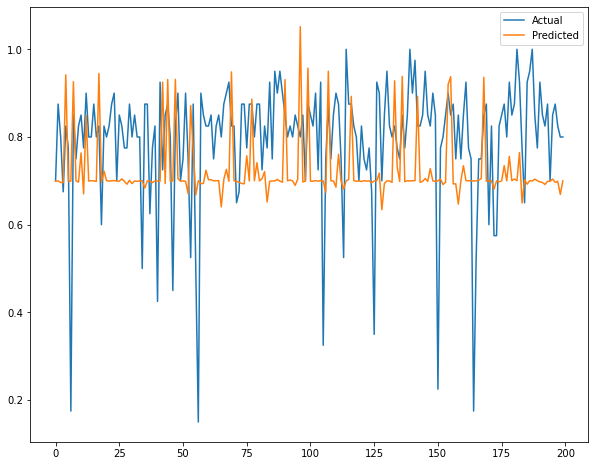

In [60]:
fig3=comparison.head(200)
fig3.plot(kind='line',figsize=(10,8))


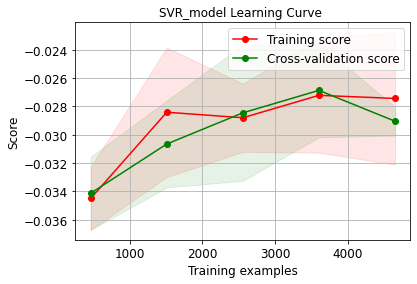

In [61]:

skplt.estimators.plot_learning_curve(svr_model, X, y,
                                     cv=2, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="SVR_model Learning Curve ");

# MLP

In [62]:
from sklearn.neural_network import MLPRegressor

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\PC\anac

Training set score: 0.008180
Training set loss: 0.008475


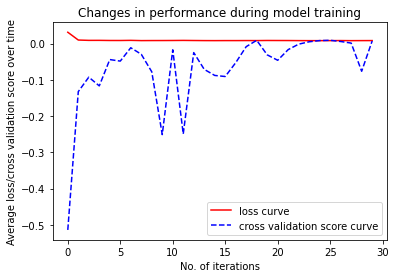

In [63]:
from sklearn.metrics import classification_report

# Train and visualise loss changes while training the netwrok
def train(X_train, y_train):
    model = MLPRegressor(max_iter=100, alpha=1e-4, solver='adam', tol=1e-4, learning_rate='adaptive', 
                          hidden_layer_sizes=(100,50,25),activation='tanh', early_stopping=True, validation_fraction=0.2)

    model.fit(X_train, y_train)
    print('Training set score: %f' % model.score(X_train, y_train))
    print('Training set loss: %f' % model.loss_)
    
    plt.figure()
    plt.title('Changes in performance during model training')
    plt.plot(model.loss_curve_, linestyle='-', color='red', label='loss curve')
    plt.plot(model.validation_scores_, linestyle='--', color='blue', label='cross validation score curve')
    plt.ylabel('Average loss/cross validation score over time')
    plt.xlabel('No. of iterations')
    plt.legend(loc='lower right')
    plt.show()
    
    return model
    
MLP_model = train(X_train, y_train)

In [64]:
MLP_prediction =MLP_model.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
MLP_prediction=np.array(MLP_prediction)

MLP_comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':MLP_prediction.flatten()})

In [65]:

print(' Mean Squared Error=',ms(y_test,MLP_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,MLP_prediction))

 Mean Squared Error= 0.017455122506403582
Mean absolute error is 0.0898541118837005


<AxesSubplot:>

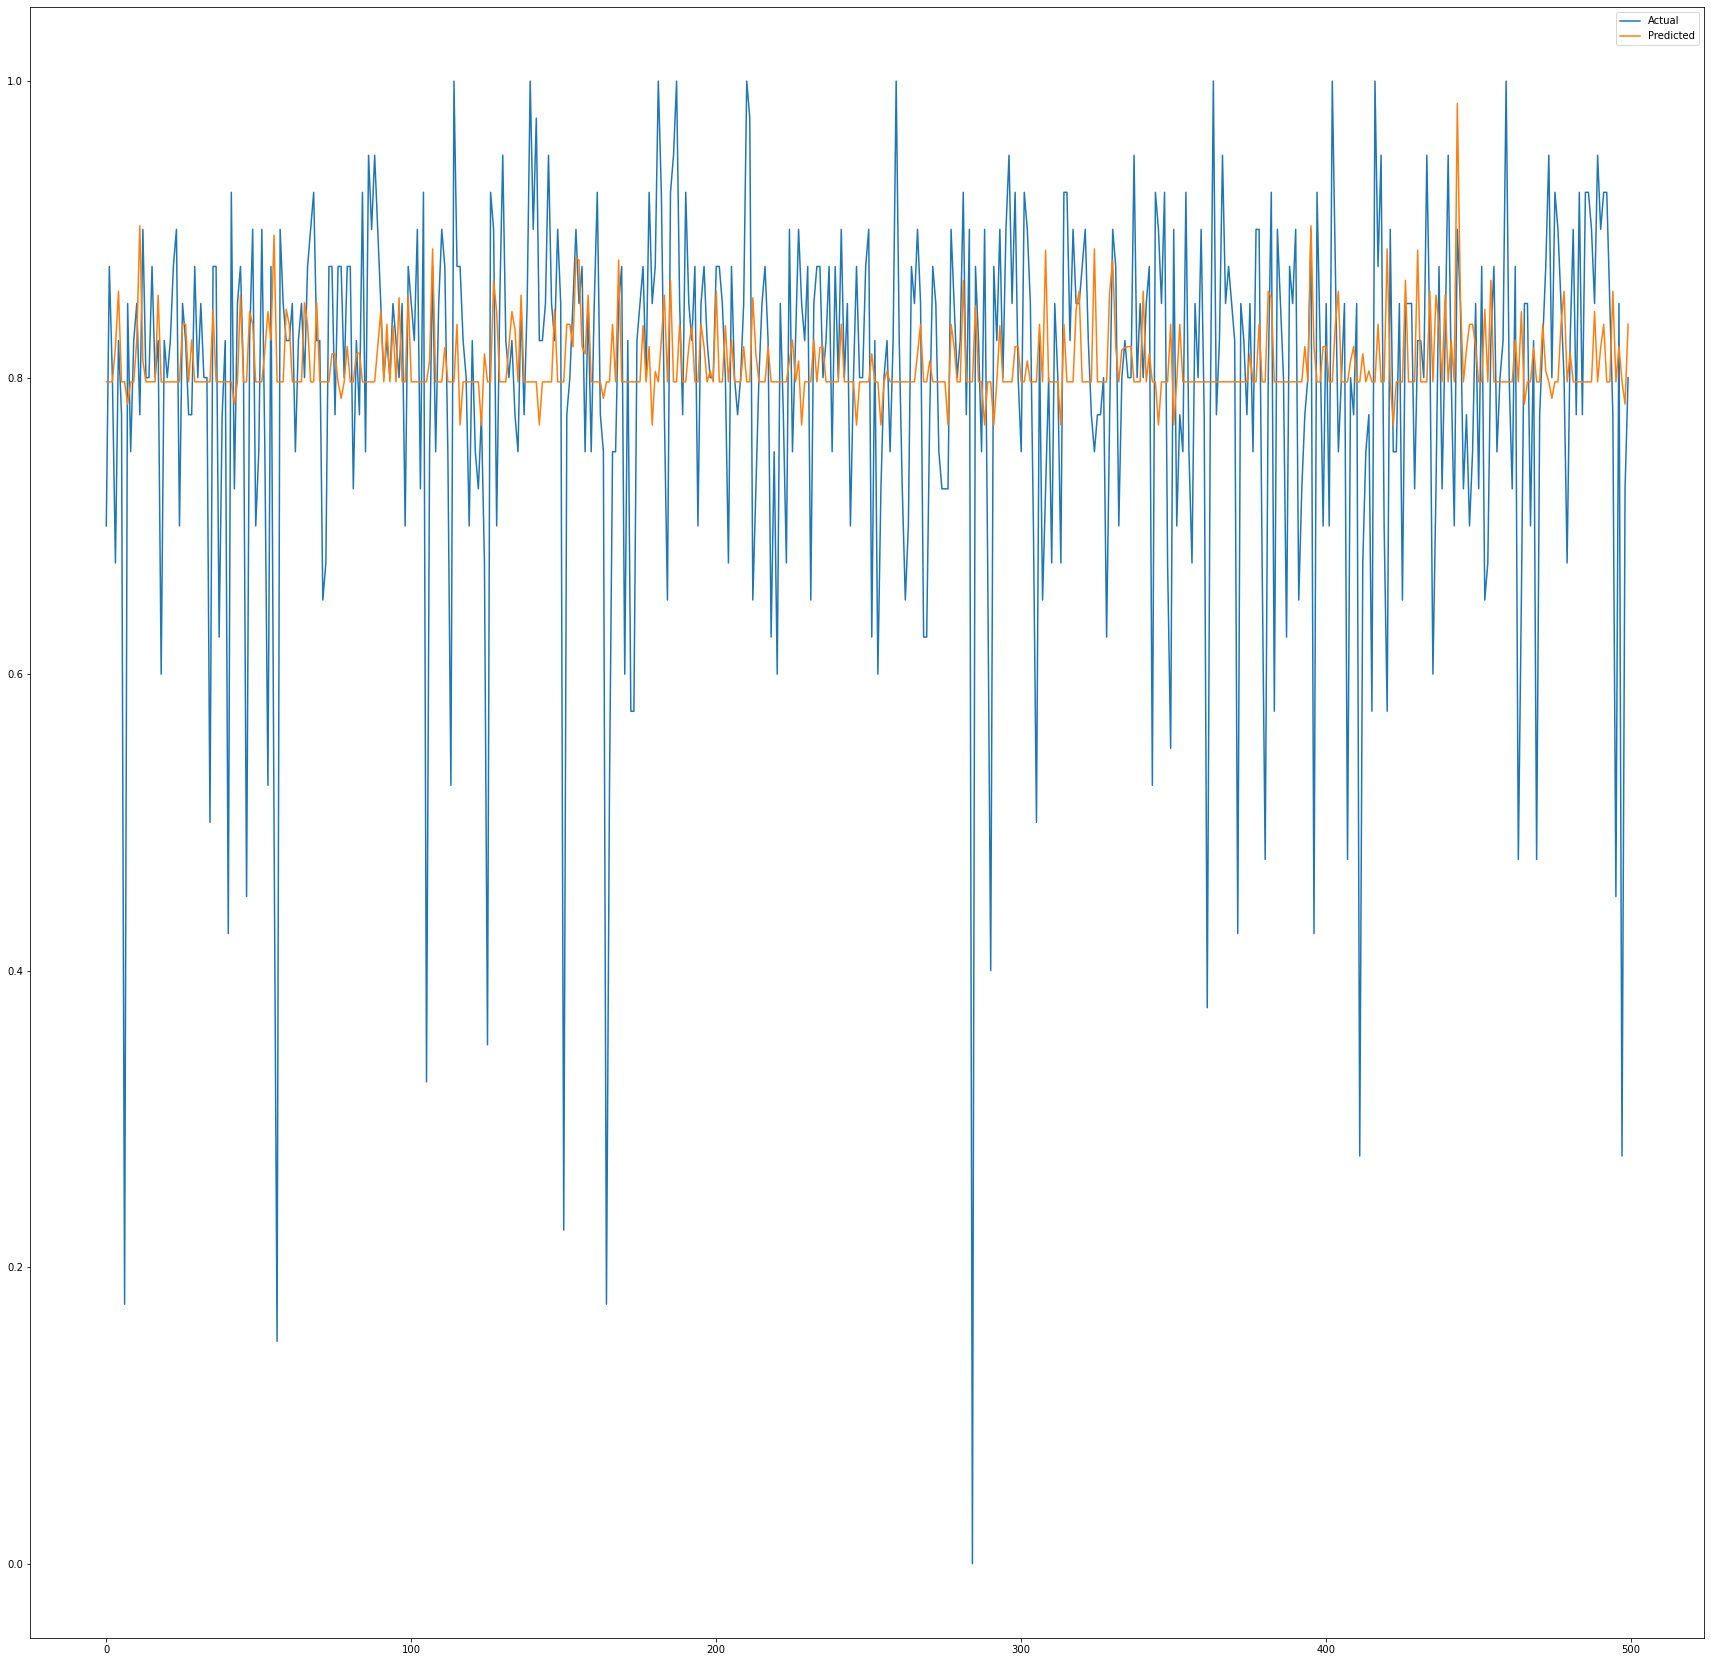

In [66]:

fig4=MLP_comparison.head(500)
fig4.plot(kind='line',figsize=(30,30))


# Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor
# # Split data into training and testing sets
features = ['Reviews','Size', 'Installs', 'Price','Category_cat']
X = data[features]
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [68]:
regressor = DecisionTreeRegressor()
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
parameters = {
 'max_depth': [3,4,5],
'criterion': ['squared_error','MAE']}
grid_GBR = GridSearchCV(estimator=regressor, param_grid = parameters, cv=2,scoring='neg_mean_squared_error')
grid_GBR.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'MAE'

  warnings.warn(some_fits_

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'MAE'],
                         'max_depth': [3, 4, 5]},
             scoring='neg_mean_squared_error')

In [70]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=5)

 The best parameters across ALL searched params:
 {'criterion': 'squared_error', 'max_depth': 5}


In [71]:
dt_model=DecisionTreeRegressor(criterion="squared_error",max_depth=4)

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [73]:
dt_prediction =dt_model.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
dt_prediction=np.array(dt_prediction)

dt_comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':dt_prediction.flatten()})
# xgb_comparison.head(10)
print(' Mean Squared Error=',ms(y_test,dt_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,dt_prediction))


 Mean Squared Error= 0.24949772487954466
Mean absolute error is 0.3448207666491703


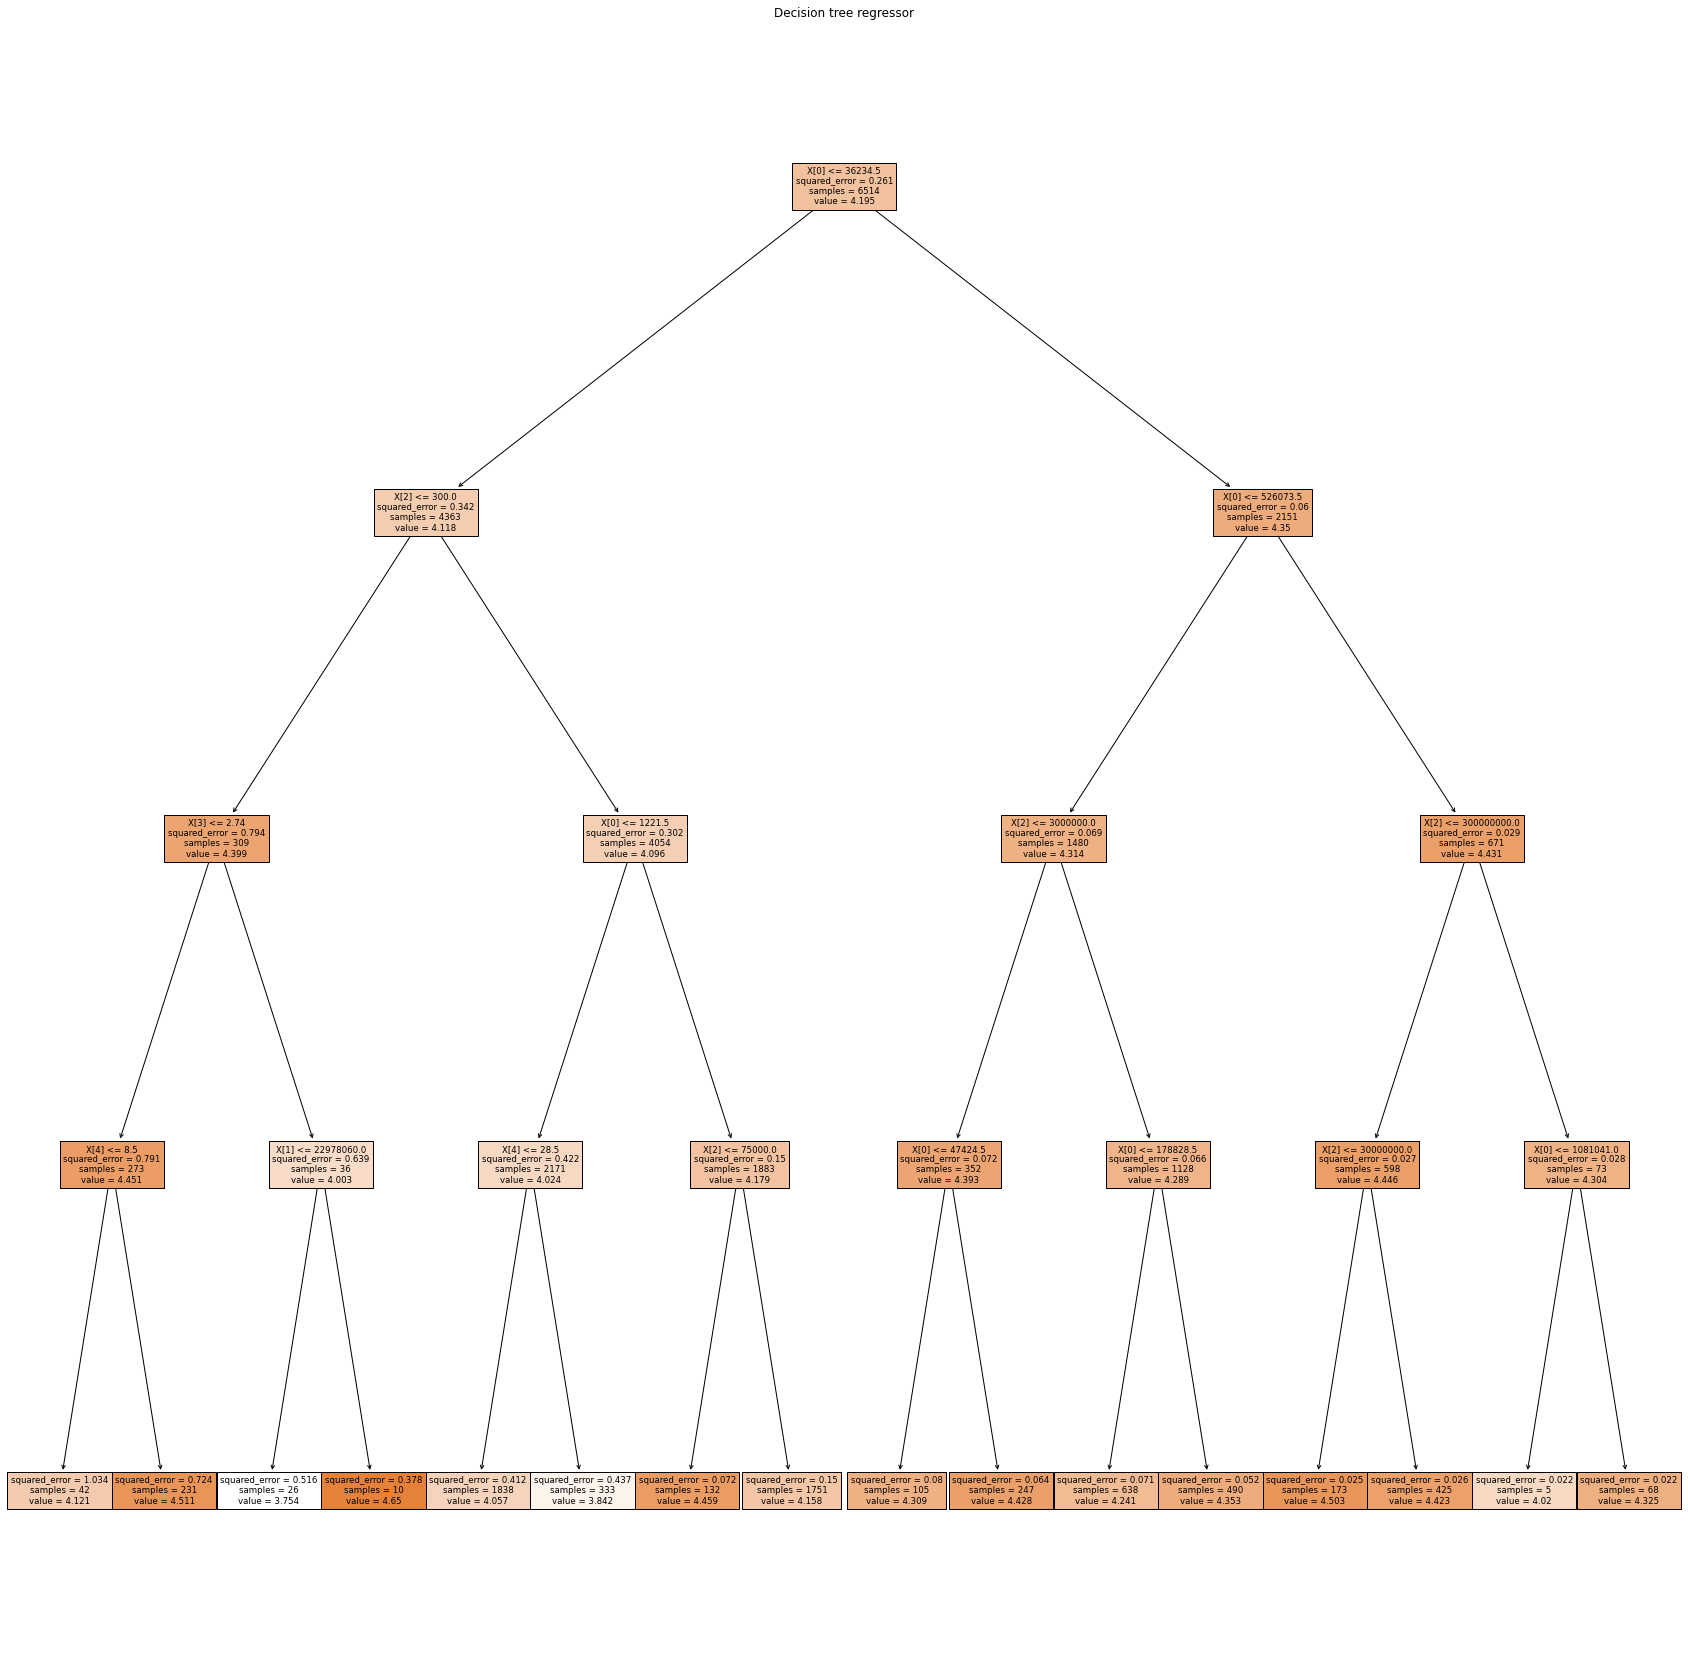

In [74]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30,30)
plot_tree(dt_model, filled=True)
plt.title("Decision tree regressor")
plt.show()

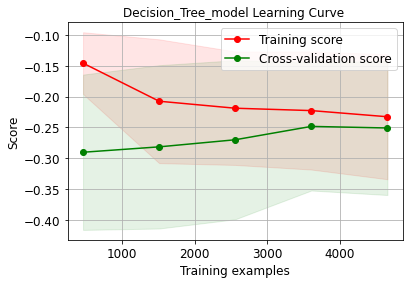

In [75]:
skplt.estimators.plot_learning_curve(dt_model, X, y,
                                     cv=2, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision_Tree_model Learning Curve ");

# Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
rf_model = RandomForestRegressor(max_depth=4, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [78]:
rf_prediction =rf_model.predict(X_test)
y_test=np.array(y_test)
rf_prediction=np.array(rf_prediction)

rf_comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':rf_prediction.flatten()})
print(' Mean Squared Error=',ms(y_test,rf_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,rf_prediction))

 Mean Squared Error= 0.2456136265117245
Mean absolute error is 0.3407301020705871


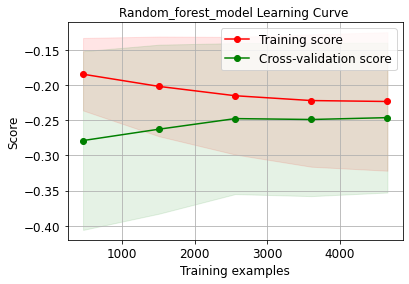

In [79]:
skplt.estimators.plot_learning_curve(RandomForestRegressor(max_depth=4, random_state=0), X, y,
                                     cv=2, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random_forest_model Learning Curve ");

# Voting Regressor

In [80]:
# MLP_model svr_model knn_model linear_model

In [81]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()


In [82]:
# voting_regr = VotingRegressor(estimators=[('MLP', MLP_model), ('svr', svr_model), ('knn', knn_model),('rf',random_forest)], n_jobs=-1)
voting_regr = VotingRegressor(estimators=[('MLP', MLP_model), ('svr', svr_model)], n_jobs=-1)

voting_regr= voting_regr.fit(X_train, y_train)

In [83]:
vr_prediction=voting_regr.predict(X_test)

In [84]:
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
vr_prediction=np.array(vr_prediction)

comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':vr_prediction.flatten()})

print(' Mean Squared Error=',ms(y_test,vr_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,vr_prediction))

 Mean Squared Error= 0.27140166500623414
Mean absolute error is 0.3538975869365347


# XG boost

In [85]:
# pip install xgboost

In [86]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.get_params()


{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [87]:
parameters = {
'eval_metric': ['rmse','mae'],
'n_jobs':[-1],
'max_depth':[3,4],
'learning_rate':[0.1,0.01,0.3]}
grid_GBR = GridSearchCV(estimator=xgb_model, param_grid = parameters, cv=2,scoring='neg_mean_squared_error')
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eval_metric': ['rmse', 'mae'],
                         'learning_rate': [0.1, 0.01, 0.3], 'max_depth': [3, 4],
                         'n_jobs': [-1]},
             scoring='neg_mean_squared_error')

In [88]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best parameters across ALL searched params:
 {'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 3, 'n_jobs': -1}


In [89]:
xgb_model = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 3, n_jobs= -1)


In [90]:
xgb_model.fit(X_train, y_train)
xgb_prediction =xgb_model.predict(X_test)
# compare_dataframe= pd.concat([y_test, Rating_pred])
y_test=np.array(y_test)
xgb_prediction=np.array(xgb_prediction)

xgb_comparison=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':xgb_prediction.flatten()})
# xgb_comparison.head(10)

 Mean Squared Error= 0.23696079969312273
Mean absolute error is 0.3297081977385163


<AxesSubplot:>

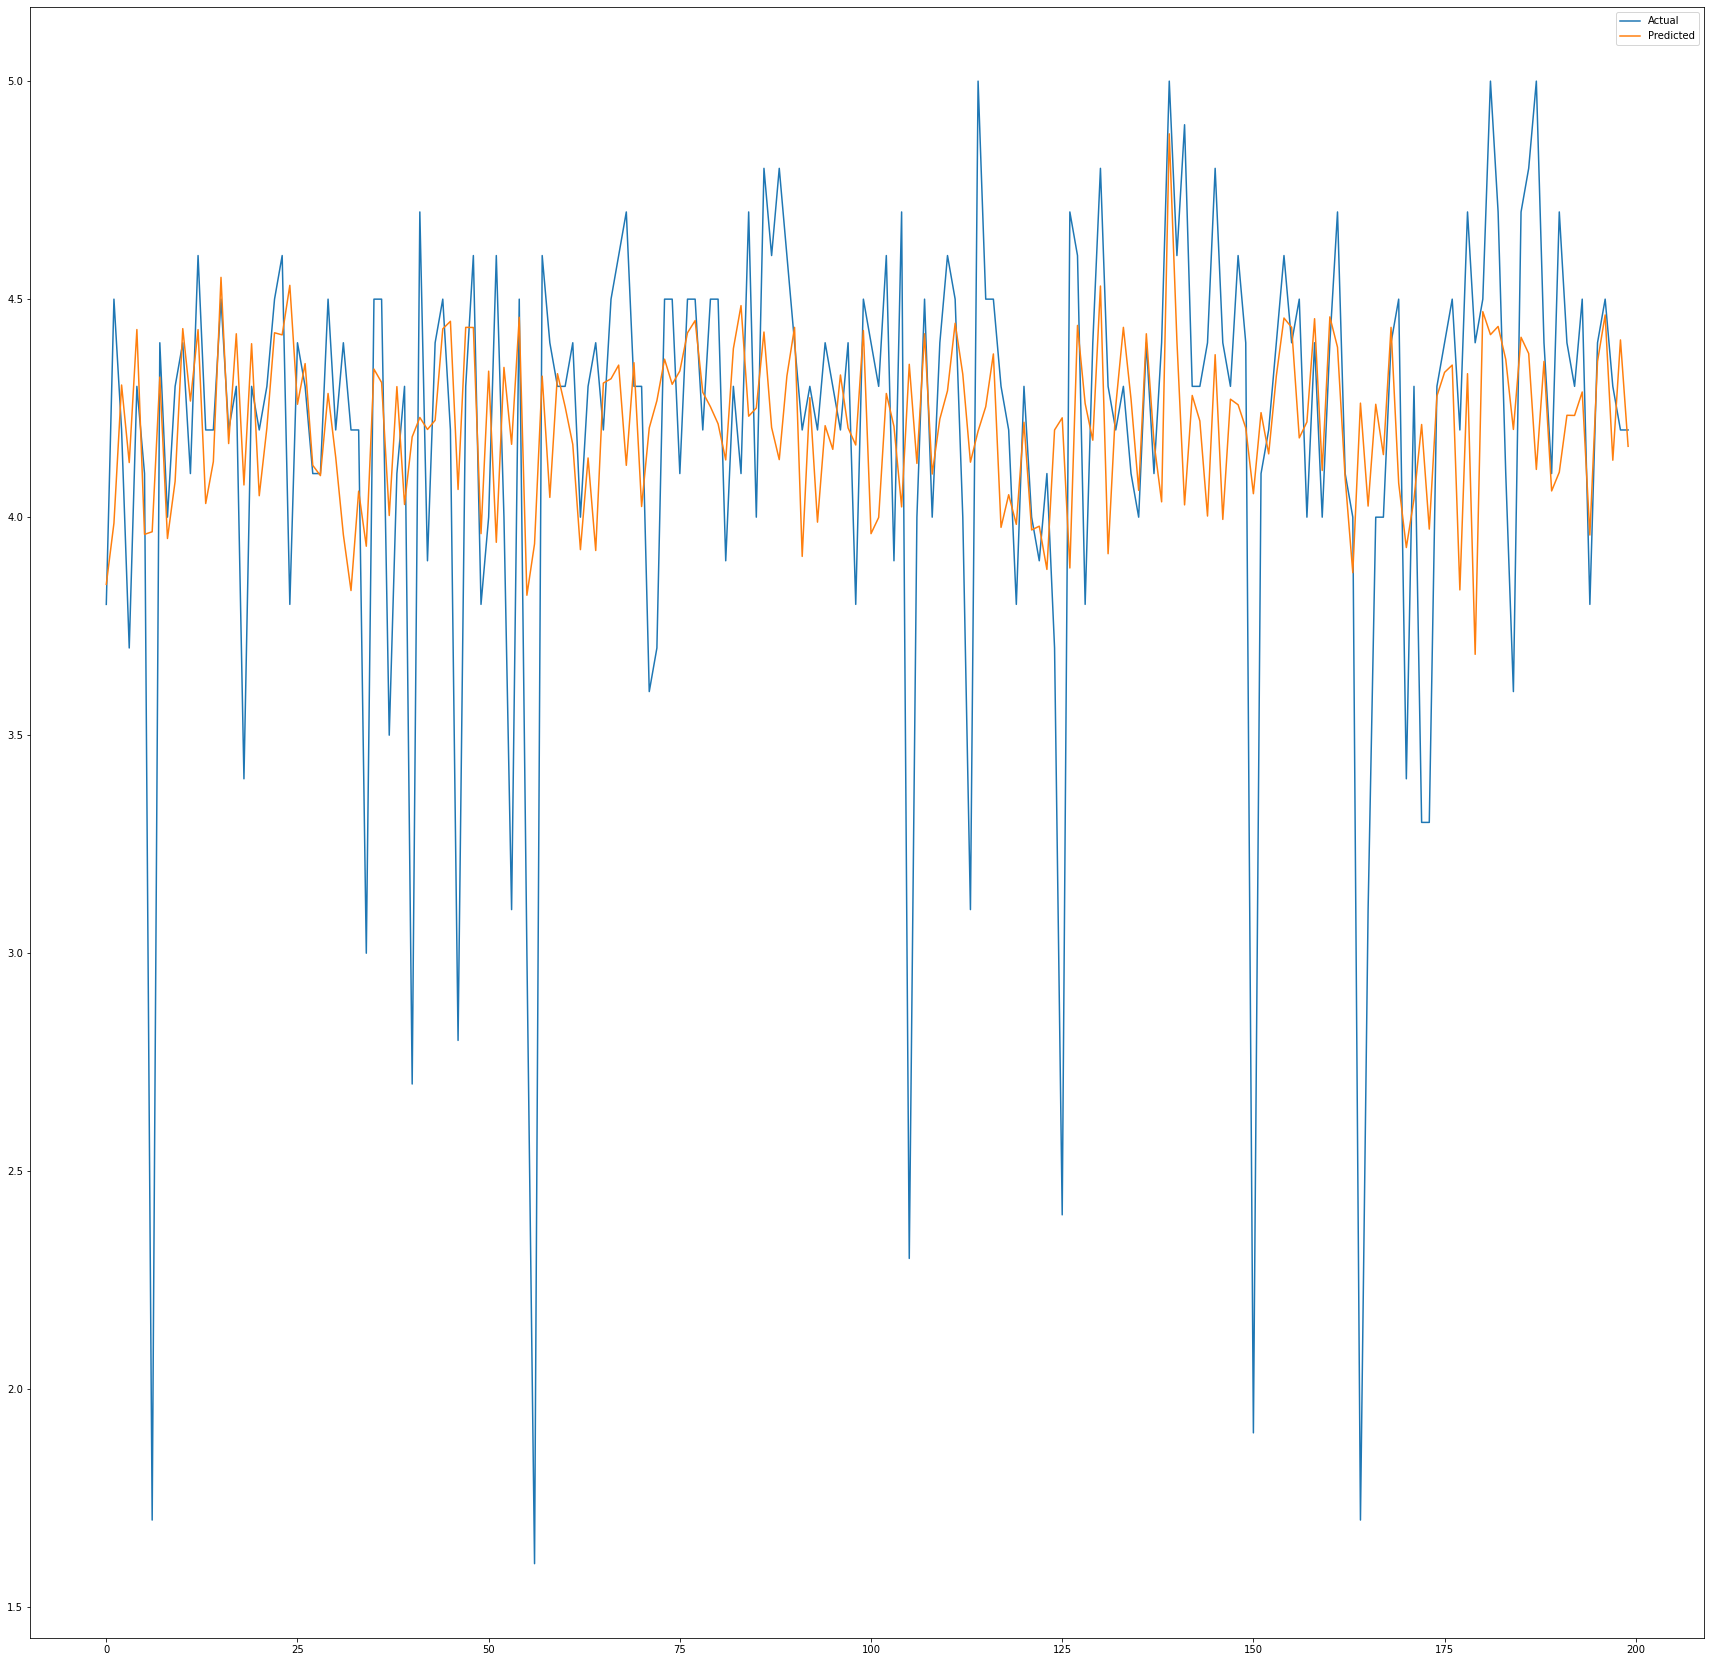

In [91]:

print(' Mean Squared Error=',ms(y_test,xgb_prediction))
print('Mean absolute error is',mean_absolute_error(y_test,xgb_prediction))
fig4=xgb_comparison.head(200)
fig4.plot(kind='line',figsize=(30,30))


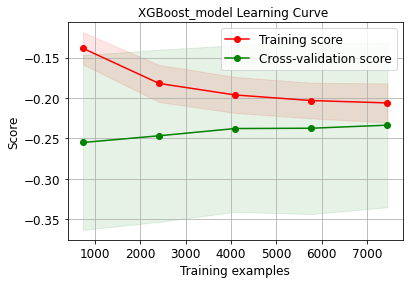

In [92]:
skplt.estimators.plot_learning_curve(xgb.XGBRegressor(learning_rate= 0.1, max_depth= 3, n_jobs= -1)
, X, y,
                                     cv=5, shuffle=True, scoring="neg_mean_squared_error", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="XGBoost_model Learning Curve ");

# meilleurs modèles (avec min MSA) : 
# 1- MLP 
# 2- SVR 